In [1]:
!pip install -q keras-ocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 635.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00


In [2]:
import keras_ocr
import matplotlib.pyplot as plt


pipeline = keras_ocr.pipeline.Pipeline()


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [3]:
images = [
    keras_ocr.tools.read(img) for img in ['Pop.jpg',
                                          'Cheque.jpg',
                                          'cheque2.jpg'
    ]
]


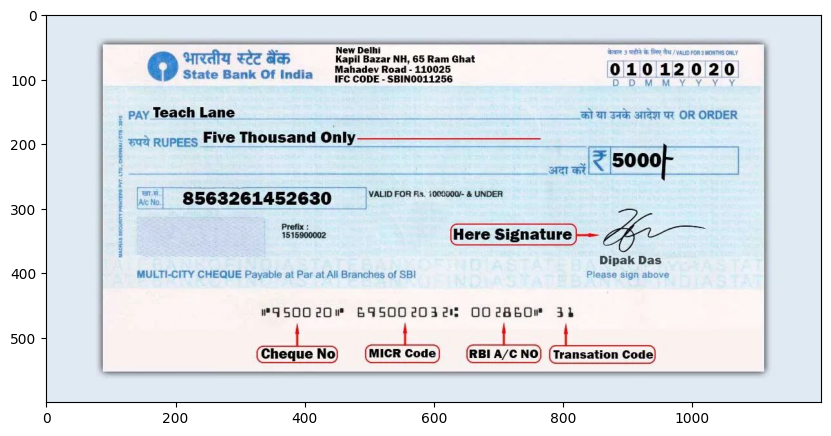

In [4]:
plt.figure(figsize = (10,20))
plt.imshow(images[0])

In [6]:
import cv2

def convert_to_grayscale(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image


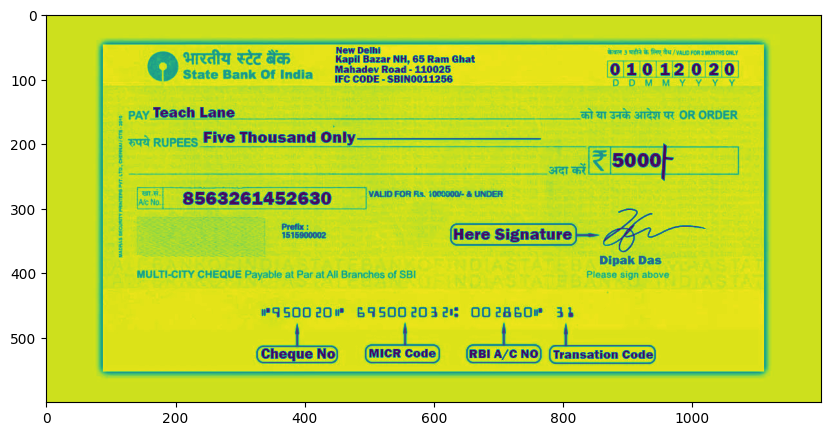

In [7]:
images[0] = convert_to_grayscale(images[0])
plt.figure(figsize = (10,20))
plt.imshow(images[0])

In [8]:
images[1] = convert_to_grayscale(images[1])
images[2] = convert_to_grayscale(images[2])

In [5]:
prediction_groups = pipeline.recognize(images)

8/8 [==============================] - 69s 8s/step


['new', 'delhi', 'eteaulalid', 'foat', 'monts', 'only', 'hraiy', 'cc', 'cics', 'kapil', 'nh', '65', 'ghat', 'bazar', 'ram', 'o', '10', '12', 'o', '20', 'mahadev', 'road', '110025', 'state', 'of', 'bank', 'india', 'sbino011256', 'ifc', 'code', 'd', 'dmamyny', 'teach', 'lane', 'sa', 'pay', 'cnot', 'or', 'order', 'dt', 'tt', 'ul', 'five', 'thousand', 'only', 'but', 'rupees', '50oof', 's', 'a', 's', 'cct', 'valid', 'for', 'fs', 'loccuoo', 'c', 'under', 'gil', 's563261453630', 'ac', 'no', 'prefix', 'here', 'signature', '1515900002', 'dipak', 'das', 'multicity', 'cheque', 'payable', 'par', 'all', 'branches', 'of', 'sbi', 'at', 'at', 'please', 'above', 'sign', 'sasoo', '05', 'ogow', 'wssoo', 'ton', '11', '00', '31', 'cheque', 'no', 'micr', 'code', 'rbi', 'ayc', 'no', 'transation', 'code']
['mrned', 'sisat', 'tae', 'areb', 'ans', 'branch', '00017h', 'peelamedu', 'tamilnadu', '641094', 'cental', 'bonk', 'of', 'indlia', 'ars', '00013', 'fugriie', '941094', 'pieit', 'c', 'ifsc', 'cbino2bo913', 'c

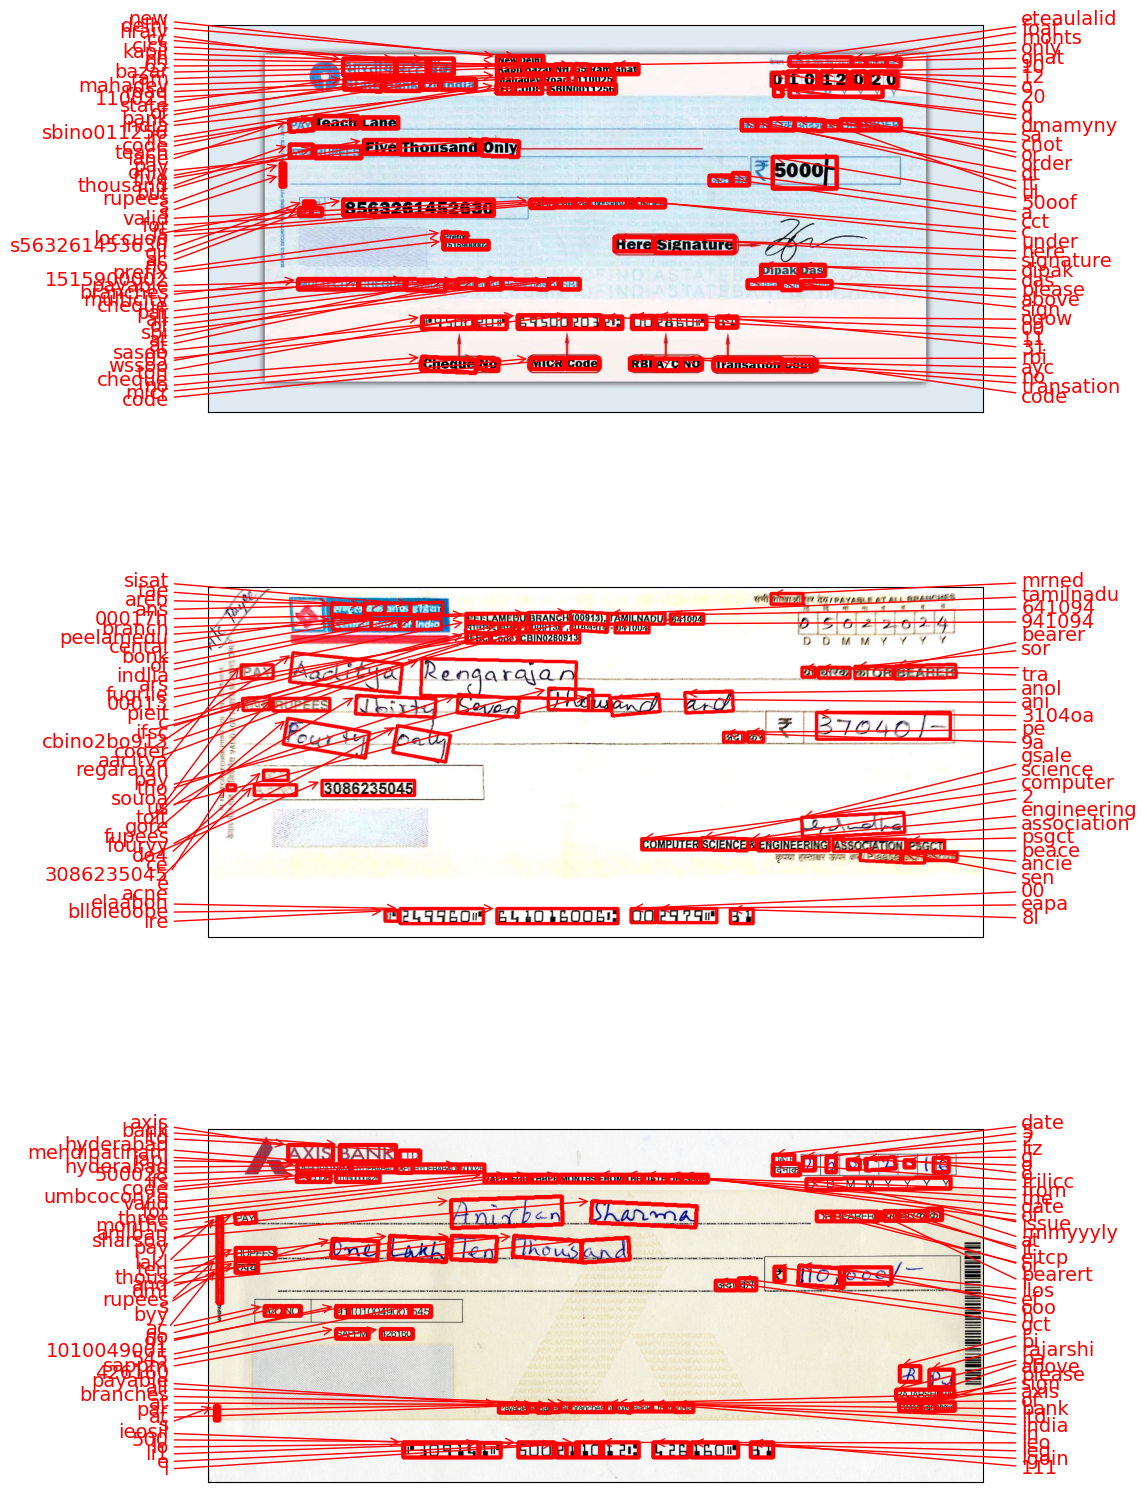

In [7]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image,
                                    predictions=predictions,
                                    ax=ax)
    word_list = [text for text, _ in predictions]
    print(word_list)